# 0. Objectives:

### What Is a Term Deposit?


A term deposit is a savings tool where money is deposited into an account at a financial institution. Term deposit investments usually have short-term maturities ranging from one month to a few years, have varying levels of required minimum deposits, and pay a fixed interest rate to the investor.

## Business Case:

- You are a bank manager and you want to maximize your Return on Time Invested (ROTI) on a client subscripting a term deposit.
- You as a data analyst, must discover which characteristics are the most valuable for increasing the money retention.

# 1. Initializing:

## 1.1 Variables definition:

| Variable Name | Role | Type | Demographic | Description | Units | Missing |
|---------------|------|------|-------------|-------------|-------|---------|
| age | Feature | Integer | Age |  |  | no |
| job | Feature | Categorical | Occupation | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |  | no |
| marital | Feature | Categorical | Marital Status | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |  | no |
| education | Feature | Categorical | Education Level | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |  | no |
| default | Feature | Binary |  | has credit in default? |  | no |
| balance | Feature | Integer |  | average yearly balance | Euros | no |
| housing | Feature | Binary |  | has housing loan? |  | no |
| loan | Feature | Binary |  | has personal loan? |  | no |
| contact | Feature | Categorical |  | contact communication type (categorical: 'cellular','telephone') |  | yes |
| day_of_week | Feature | Date |  | last contact day of the week |  | no |
| month | Feature | Date |  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |  | no |
| duration | Feature | Integer |  | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |  | no |
| campaign | Feature | Integer |  | number of contacts performed during this campaign and for this client (numeric, includes last contact) |  | no |
| pdays | Feature | Integer |  | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |  | yes |
| previous | Feature | Integer |  | number of contacts performed before this campaign and for this client |  | no |
| poutcome | Feature | Categorical |  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |  | yes |
| y | Target | Binary |  | has the client subscribed a term deposit? |  | no|

## 1.2 Importing:

In [1]:
# !pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from random import choice

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style('white')

In [3]:
colors =  ['#005CA9', '#F39200', '#F9B000', '#00B5E5', '#EF765E', '#54BBAB', '#B26F9B', '#AFCA0B', '#004198', '#FFFFFF']

## 1.3 General infos:

In [4]:
bank_df = pd.read_csv("/content/bank.csv")
bank_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# 2. EDA - Exploratory Data Analysis:

## 2.1 Variables distribution:

### 2.1.1 Numeric:

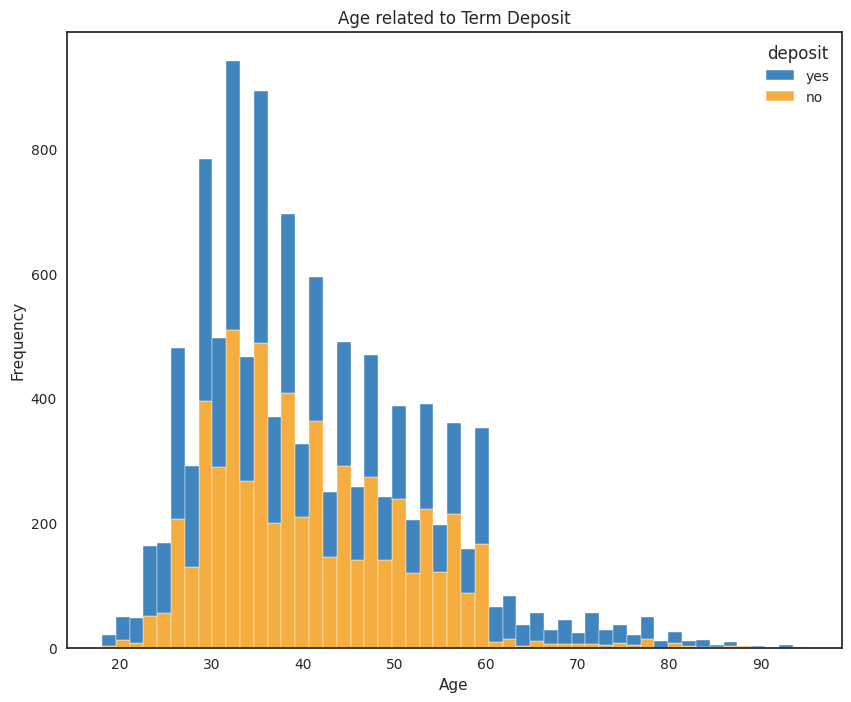

In [7]:
plt.figure(figsize=(10, 8))
sns.histplot(data=bank_df, x="age", hue="deposit", multiple="stack", palette=[colors[0], colors[1]])
plt.title('Age related to Term Deposit')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

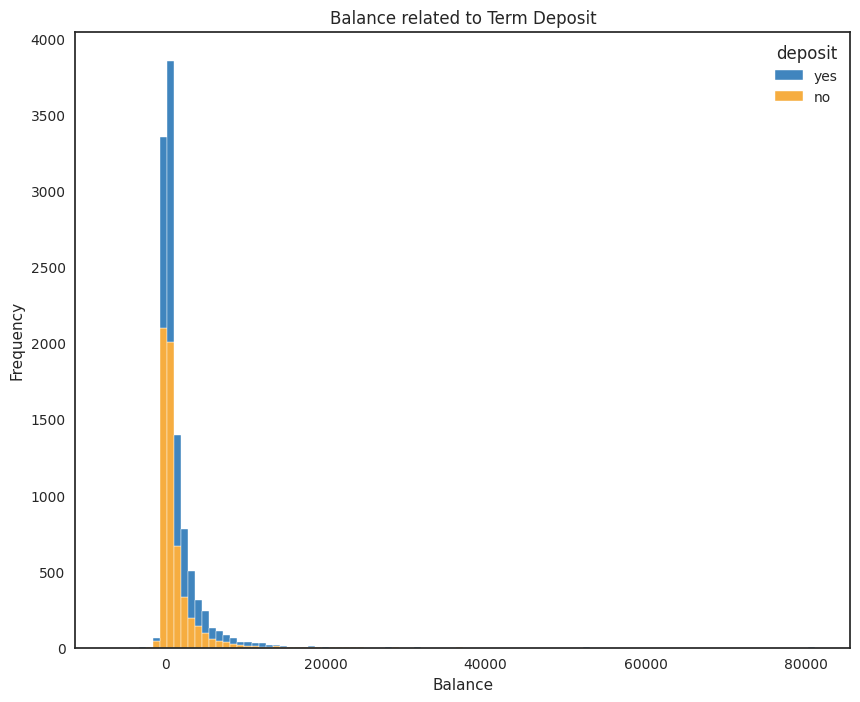

In [8]:
plt.figure(figsize=(10, 8))
sns.histplot(data=bank_df, x="balance", hue="deposit", multiple="stack", bins=100, palette=[colors[0], colors[1]])
plt.title('Balance related to Term Deposit')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [9]:
bank_df[['age', 'balance']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0


In [10]:
bank_df[['age', 'balance']].corr()

,age,balance
age,1.0000,0.1123
balance,0.1123,1.0000


### 2.1.2 Binary and categorical:

In [11]:
bank_df.deposit.value_counts().reset_index()

,deposit,count
0,no,5873
1,yes,5289


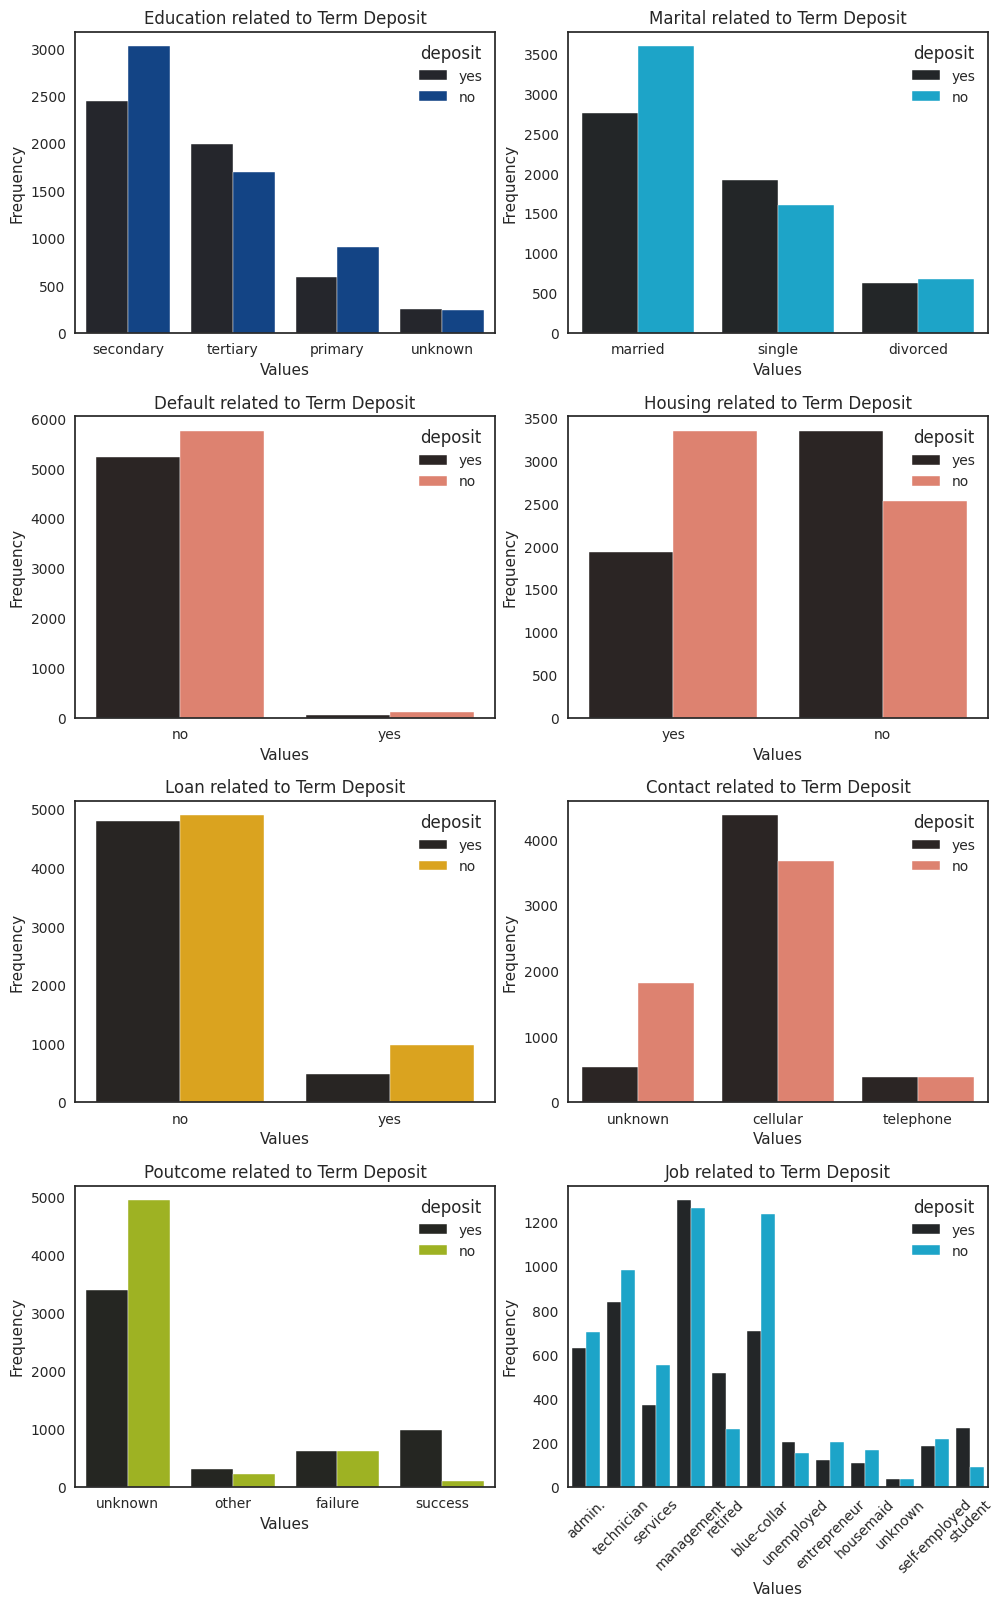

In [12]:
# Layout for graph display:

cols = ['education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'job']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 16))
f_axes = axes.flatten()

#  Graphs for features related to target:
def plot_count(ds, ax, col, color):

  fig = sns.countplot(ds, x=col, hue='deposit', ax=ax, color=color)
  fig.set_xlabel('Values')
  fig.set_ylabel('Frequency')
  fig.set_title(f'{col.capitalize()} related to Term Deposit')
  plt.xticks(rotation=45, ha='center')

for index, cols in enumerate(cols):

    plot_count(bank_df, f_axes[index], col = cols, color=choice(colors[1:-1]))


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

## 2.2 Time column analysis:

In [13]:
print(bank_df.month.unique())

deposits_by_month = pd.DataFrame(bank_df[['month', 'deposit']].groupby('month').value_counts(normalize=True).reset_index())
deposits_by_month = deposits_by_month.sort_values(by=['deposit','proportion'], ascending=True)
deposits_by_month.head(12)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


,month,deposit,proportion
5,dec,no,0.090909
15,mar,no,0.101449
23,sep,no,0.156740
21,oct,no,0.176020
1,apr,no,0.374865
7,feb,no,0.431701
2,aug,no,0.547070
12,jun,no,0.553191
18,nov,no,0.572641
10,jul,no,0.585865


In [14]:
deposits_by_day = pd.DataFrame(bank_df[['day', 'deposit']].groupby('day').value_counts(normalize=True))
deposits_by_day = deposits_by_day.sort_values(by=['deposit','proportion'], ascending=True)
deposits_by_day.head(10)

,,proportion
day,deposit,
10,no,0.257669
1,no,0.262295
25,no,0.406250
3,no,0.418301
22,no,0.427509
4,no,0.427861
30,no,0.433054
12,no,0.451685
2,no,0.455090


Proportions of how many clients don't deposit to total of an day or month seems very random, with some months being more successful than others.

## 2.3 Values for descriptive analysis and benchmark purposes:

> These variables are most for performance and benchmark purposes and aren't suitable for a model.

> We can check by looking at metrics like variance and correlation.

In [15]:
vars = ['day', 'duration', 'campaign', 'pdays','previous', 'deposit']

In [16]:
bank_df[vars[:-1]].describe()

,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,15.658036,371.993818,2.508421,51.330407,0.832557
std,8.420740,347.128386,2.722077,108.758282,2.292007
min,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,22.000000,496.000000,3.000000,20.750000,1.000000
max,31.000000,3881.000000,63.000000,854.000000,58.000000


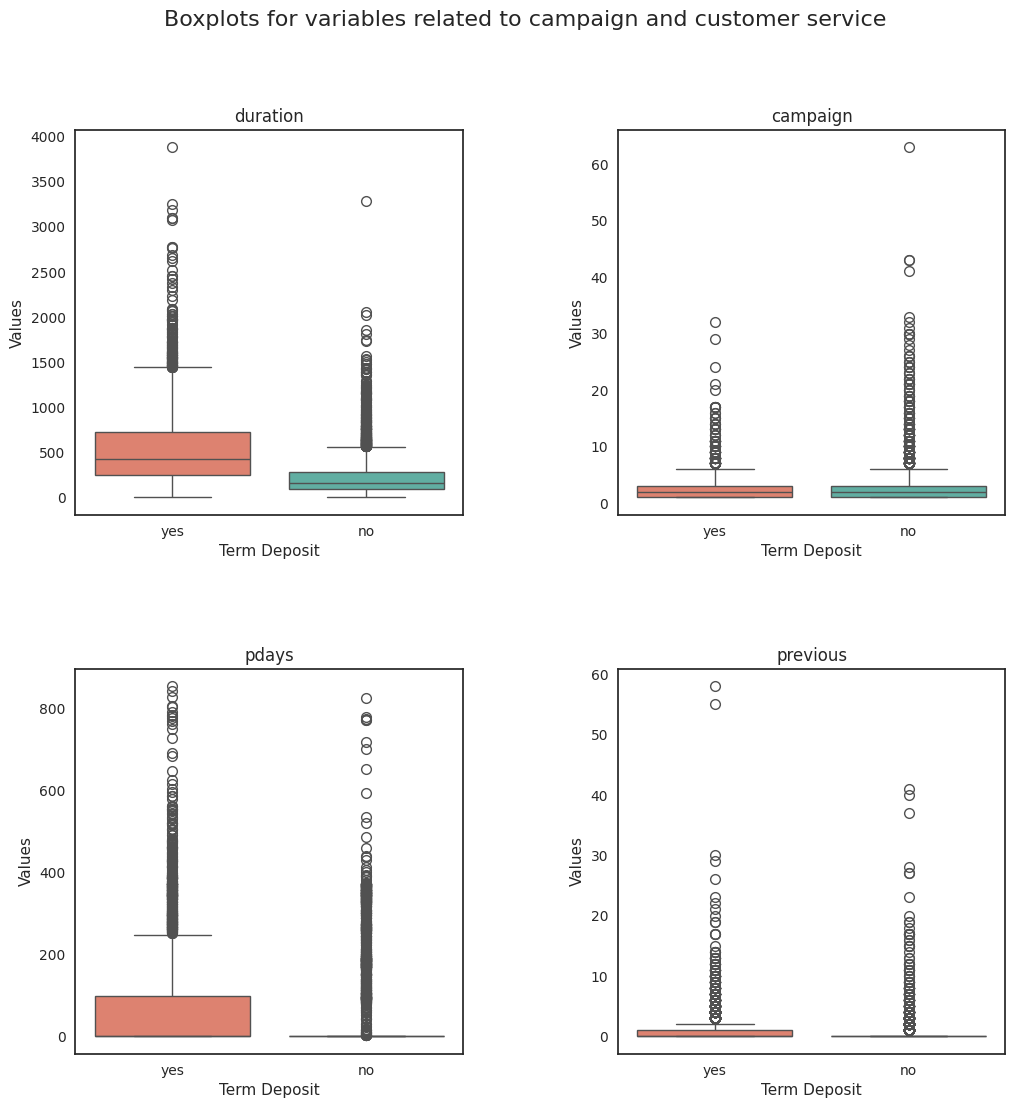

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

vars_boxplot = vars[1:-1]
for i, var in enumerate(vars_boxplot):
    row = (i // 2)
    col = (i % 2)

    sns.boxplot(data=bank_df, x='deposit', y=var, hue='deposit', ax=axes[row, col], palette=[colors[4], colors[5]])
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('Term Deposit')
    axes[row, col].set_ylabel('Values')

fig.suptitle('Boxplots for variables related to campaign and customer service', fontsize=16)
plt.show()

In [18]:
bank_df.deposit = bank_df.deposit.replace({'no': 0, 'yes': 1}).astype(int)

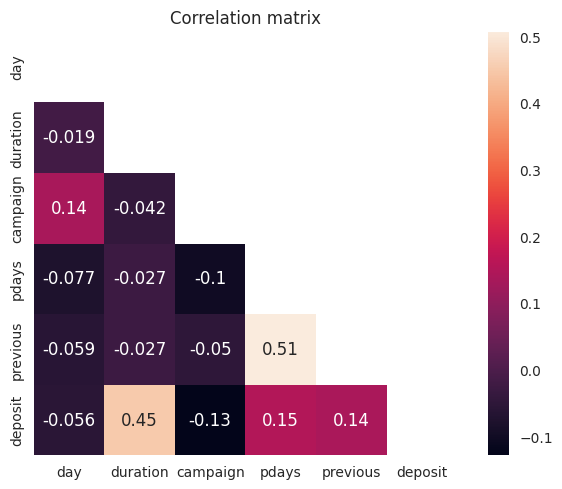

In [19]:
corr = bank_df[vars].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask=mask, square=True, linewidths=0);
plt.title('Correlation matrix');

# 3. Model:

I'm choosing CatBoost to get feature importances because of the following reasons:
1. Many categorical variables, reducing the need of manually encoding, thus avoiding target leakage or arbitrary atribution;
2. Outliers in the balance colummn;
3. It's easy to get the coefficients.

## 3.1 Feature selection:

In [20]:
# I've removed other columns because either they have little to no correlation or may have bias.

vars = ['age', 'job', 'marital', 'education', 'balance', 'housing','loan', 'contact', 'deposit']

cat_vars = ['job','marital', 'education', 'housing','loan', 'contact']

In [21]:
bank_df[vars].dtypes

,0
age,int64
job,object
marital,object
education,object
balance,int64
housing,object
loan,object
contact,object
deposit,int64


## 3.2 Creating the model:

In [22]:
X = bank_df[vars].iloc[:, :-1]

y = bank_df['deposit']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)

model = CatBoostClassifier(iterations=600,
                           learning_rate=1.0,
                           depth=8,
                           eval_metric='Accuracy',
                           verbose=200)

model.fit(X_train, y_train, cat_features=cat_vars)

0:	learn: 0.6551189	total: 130ms	remaining: 1m 17s
200:	learn: 0.9516187	total: 10.3s	remaining: 20.5s
400:	learn: 0.9955800	total: 17s	remaining: 8.45s
599:	learn: 0.9997611	total: 21.9s	remaining: 0us


## 3.3 Results:

In [24]:
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.641347187388033

In [25]:
confusion_matrix(y_test, predictions, labels =[0, 1])

array([[991, 459],
       [542, 799]])

/usr/local/lib/python3.12/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


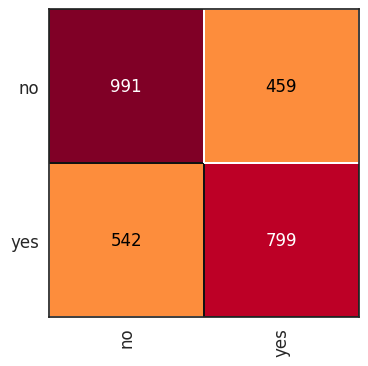

In [26]:
plt.subplots(figsize=(4,4))
from yellowbrick.contrib.wrapper import classifier
cm_model = classifier(model)
cm = ConfusionMatrix(cm_model, classes=['no', 'yes'])
cm.score(X_test, y_test);

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1450
           1       0.64      0.60      0.61      1341

    accuracy                           0.64      2791
   macro avg       0.64      0.64      0.64      2791
weighted avg       0.64      0.64      0.64      2791



## 3.4 Feature importance:

In [28]:
print(vars[:-1])

importance = model.get_feature_importance(type='PredictionValuesChange')
importance

['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact']


array([19.82466326, 20.95491065,  9.83946286, 10.19107161, 23.55614458,
        5.82528475,  2.48252614,  7.32593616])

In [29]:
importance_df = pd.DataFrame({
    'features': vars[:-1],
    'importance': importance
}).sort_values(by='importance', ascending=False)

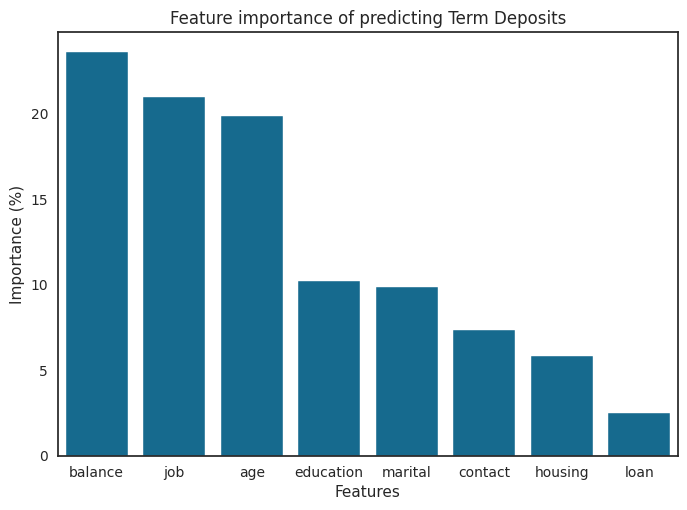

In [30]:
fig = sns.barplot(importance_df, x='features', y='importance')
fig.set_xlabel('Features')
fig.set_ylabel('Importance (%)')
plt.title("Feature importance of predicting Term Deposits");

# 4. Conclusion:

1. The broadest client profiles the bank has are young or elderly individuals with a good amount of capital saved and no housing loan.
   
2. A good portion of contracts are either signed or not signed during the first contact with the client.
  
3. By knowing a client's age, job, and financial balance, we can get a good estimate of their likelihood of investing through the bank.